In [1]:
import pandas as pd
import numpy as np

In [14]:
user_engagement = pd.read_csv('./takehome_user_engagement.csv',encoding='latin-1')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
#Is there any null values?
user_engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [15]:
users = pd.read_csv('./takehome_users.csv',encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [21]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [18]:
#Is there any null values?
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

The null values in 'invited_by_user_id' column are as expected because some users that signed up might not be invited by another user. There are null values in the 'last_creation_time' column.

Let's create a binary column of the adopted user: a user who has logged into the product on three separate days in at least one seven-day period by definition.

In [40]:
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp']) #convert time_stamp to datetime object
engagement_counts = pd.DataFrame(user_engagement['user_id'].value_counts()) #count number of user_id appearances
engagement_counts.reset_index(inplace=True)
engagement_counts.columns = ['user_id','count']

#grab only users with 3 or more counts
engagement = user_engagement[user_engagement['user_id'].isin(engagement_counts[engagement_counts['count'] >= 3]['user_id'])] 
engagement.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [44]:
#generate list of users who adopted the products
users_adopted = []
for user in engagement.user_id.unique(): 
    tmp_datetime = engagement[engagement.user_id == user]['time_stamp'].reset_index()['time_stamp']
    for x in range(len(tmp_datetime) - 2):
        if tmp_datetime[x + 2] - tmp_datetime[x] < pd.Timedelta('7 days'):
            users_adopted.append(user)
            break

In [49]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [54]:
#create a new binary column in users dataframe: whether or not that user is users who adopted the products
users['adopted'] = users.apply(lambda x: x['object_id'] in users_adopted,axis=1)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [60]:
#fill na with -1
users['last_session_creation_time'].fillna(-1,inplace=True)
users['invited_by_user_id'].fillna(-1,inplace=True)

#convert creation_time to year, month, day, hour
users['creation_hour'] = pd.to_datetime(users.creation_time).dt.hour
users['creation_year'] = pd.to_datetime(users.creation_time).dt.year
users['creation_month'] = pd.to_datetime(users.creation_time).dt.month
users['creation_day'] = pd.to_datetime(users.creation_time).dt.day

#convert creation source to binary
users['creation_source'] = users['creation_source'].apply(lambda x: x=='GUEST_INVITE')

The plan is to run a gradient boosting model and plot feature importances to determine which features are important. Categorical variables are taken care by automatically by the model package.

In [61]:
#split data
from sklearn.model_selection import train_test_split
train,test = train_test_split(users,test_size=0.2)

import lightgbm as lgb

features = ['creation_hour','creation_year','creation_month','creation_day','creation_source','last_session_creation_time','opted_in_to_mailing_list',
            'enabled_for_marketing_drip','org_id','invited_by_user_id'] 

#reformat train dataset
lgb_train_df = lgb.Dataset(train[features],
                      label=train['adopted'],
                      categorical_feature=['creation_source','org_id','invited_by_user_id','creation_hour','creation_year','creation_month','creation_day'])
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'AUC'},
    'num_leaves': 100,
    'max_depth': 10,
}

bst = lgb.train(params, lgb_train_df, 100)

//anaconda/lib/python3.5/site-packages/lightgbm/basic.py:1005: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


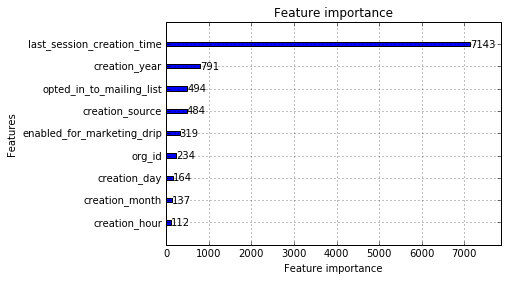

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
lgb.plot_importance(bst)

We can see the feature importance of each feature to predict adopted users on the plot above. The most important feature is last_sesion_creation_time. 